# Search

Question: Given a sorted list of numbers, find the index of a specific value in the list. If no such value, return -1.

**Solution 1**: Sequential Search

In [1]:
import time
import random

import matplotlib.pyplot as plt
%matplotlib inline  

def generate_random_array(n):
    return [random.random() for e in range(n)]

In [6]:
3 in [1, 2, 3] # => True
nums = generate_random_array(2)


In [7]:
nums

[0.2878642192902623, 0.2565962517900786]

In [8]:
# vowels list
vowels = ['a', 'e', 'i', 'o', 'i', 'u']

# index of 'e' in vowels
index = vowels.index('e')
print('The index of e:', index)

# element 'i' is searched
# index of the first 'i' is returned
index = vowels.index('i')

print('The index of i:', index)

The index of e: 1
The index of i: 2


In [12]:
random_lists = [generate_random_array(1 * n) for n in range(1, 21)]
len(random_lists)
random_lists

20

In [13]:

def search(nums):
    import time
    start = time.time()
    r = 1 in nums
    t = time.time() - start
    return r, len(nums), t

rst = [search(l) for l in random_lists]
rst

[(False, 1, 1.1920928955078125e-06),
 (False, 2, 4.76837158203125e-07),
 (False, 3, 2.384185791015625e-07),
 (False, 4, 9.5367431640625e-07),
 (False, 5, 9.5367431640625e-07),
 (False, 6, 4.76837158203125e-07),
 (False, 7, 1.1920928955078125e-06),
 (False, 8, 4.76837158203125e-07),
 (False, 9, 2.384185791015625e-07),
 (False, 10, 7.152557373046875e-07),
 (False, 11, 7.152557373046875e-07),
 (False, 12, 2.384185791015625e-07),
 (False, 13, 7.152557373046875e-07),
 (False, 14, 9.5367431640625e-07),
 (False, 15, 1.430511474609375e-06),
 (False, 16, 4.76837158203125e-07),
 (False, 17, 4.76837158203125e-07),
 (False, 18, 2.384185791015625e-07),
 (False, 19, 7.152557373046875e-07),
 (False, 20, 7.152557373046875e-07)]

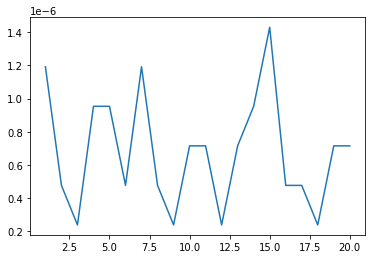

In [14]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

In [15]:
def search(num_list, val):
    # If empty
    if num_list == None:
        return -1
    
    for i in range(0, len(num_list)):
        if (num_list[i] == val):
            return i
    return -1

In [16]:
num_list = [1,2,3,5,7,8,9]
print(search(num_list, 7))
print(search(num_list, 4))

4
-1


**Solution 2**: Binary Search (recursive)

In [17]:
def bi_search_re(num_list, val):
    def bi_search(l, h):
        # Not found
        if l > h:
            return -1
        
        # Check mid
        mid = (l + h) // 2
        if (num_list[mid] == val):
            return mid;
        elif (num_list[mid] < val):
            return bi_search(mid + 1, h)
        else:
            return bi_search(l, mid - 1)
        
    return bi_search(0, len(num_list))

In [18]:
num_list = [1,2,3,5,7,8,9]
print(search(num_list, 7))
print(search(num_list, 4))

4
-1


**Solution 3**: Binary Search (iterative)

In [6]:
def bi_search_iter(alist, item):
    left, right = 0, len(alist) - 1
    while left <= right:
        mid = (left + right) // 2
        if alist[mid] < item:
            left = mid + 1
        elif alist[mid] > item:
            right = mid - 1
        else: # alist[mid] = item
            return mid
    return -1

In [7]:
num_list = [1,2,3,5,7,8,9]
print(bi_search_iter(num_list, 7))
print(bi_search_iter(num_list, 4))

4
-1


In [60]:
import unittest
class TestBinarySearch1(unittest.TestCase):
    def setUp(self):
        self._f = bi_search_iter
    
    def test_empty(self):
        alist = []
        r = self._f(alist, 5)
        self.assertEqual(-1, r)

    def test_one(self):
        alist = [1]
        r = self._f(alist, 0)
        self.assertEqual(-1, r)
        r = self._f(alist, 1)
        self.assertEqual(0, r)

    def test_two(self):
        alist = [1,10]
        r = self._f(alist, 0)
        self.assertEqual(-1, r)
        r = self._f(alist, 1)
        self.assertEqual(0, r)
        r = self._f(alist, 2)
        self.assertEqual(-1, r)
        r = self._f(alist, 10)
        self.assertEqual(1, r)
        r = self._f(alist, 11)
        self.assertEqual(-1, r)
        
    def test_multiple(self):
        alist = [1,2,3,4,5]
        r = self._f(alist, 5)
        self.assertEqual(4, r)
        r = self._f(alist, 4)
        self.assertEqual(3, r)
        r = self._f(alist, 2)
        self.assertEqual(1, r)
        r = self._f(alist, 1)
        self.assertEqual(0, r)
        r = self._f(alist, 6)
        self.assertEqual(-1, r)
        r = self._f(alist, 0)
        self.assertEqual(-1, r)
        
    def test_duplicate(self):
        alist = [1,1,1,2,3,3,3,3,3,3,4,5,5,5]
        r = self._f(alist, 5)
        self.assertEqual(5, alist[r])
        r = self._f(alist, 4)
        self.assertEqual(4, alist[r])
        r = self._f(alist, 2)
        self.assertEqual(2, alist[r])
        r = self._f(alist, 3)
        self.assertEqual(3, alist[r])
        r = self._f(alist, 1)
        self.assertEqual(1, alist[r])
        r = self._f(alist, 6)
        self.assertEqual(-1, -1)
        r = self._f(alist, 0)
        self.assertEqual(-1, -1)


In [61]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.028s

OK


In [66]:
class TestBinarySearch1(unittest.TestCase):
    def setUp(self):
        self._f = binarysearch
        
    def test_first_found(self):
        alist = [1,1,1,2,3,3,3,3,3,3,4,5,5,5]
        r = self._f(alist, 1)
        self.assertEqual(0, r)

In [67]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


In [53]:
def binarysearch(alist, item):
    if len(alist) == 0:
        return -1
    
    left, right = 0, len(alist) - 1
    while left + 1 < right:
        mid = left + (right - left) // 2
        if alist[mid] == item:
            right = mid
        elif alist[mid] < item:
            left = mid
        elif alist[mid] > item:
            right = mid
    
    if alist[left] == item:
        return left
    if alist[right] == item:
        return right
    
    return -1